In [1]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
path_data_dir = Path().cwd().parent.parent / "data"
print(path_data_dir)


/home/tim/Documents/feat-store/data


In [4]:
def cnc_add_y_label_binary(df, df_labels, col_list_case=None):

    df_labels["unix_date"] = df_labels["unix_date"].astype(int)

    if col_list_case is not None:
        df = df.merge(df_labels[["unix_date"] + col_list_case], on=["unix_date"])

    # select all rows in df_labels where "failed_tools" is not empty
    df_labels = df_labels[df_labels["failed_tools"].notna()].copy()

    # convert each "failed_tools" string to a list
    df_labels["failed_tools"] = df_labels["failed_tools"].apply(lambda x: x.split(" "))

    df_labels = df_labels.explode('failed_tools')

    # change dtype of "failed" column to int
    df_labels = df_labels[["unix_date", "failed", "failed_tools"]]
    df_labels["failed"] = df_labels["failed"].astype(int)

    # drop any rows where "failed_tools" is not a numeric value
    df_labels = df_labels[df_labels["failed_tools"].apply(lambda x: x.isnumeric())]
    df_labels["failed_tools"] = df_labels["failed_tools"].astype(int)

    df = pd.merge(df, df_labels[["unix_date", "failed", "failed_tools"]], left_on=["unix_date", "tool_no"], right_on=["unix_date", "failed_tools"], how="left").drop(columns=["failed_tools"])
    df["failed"] = df["failed"].fillna(0).astype(int)

    df["y"] = df["failed"].astype(int)
    df = df.drop(columns=["failed"])

    # drop any rows where "y" is > 1
    df = df[df["y"] <= 1]

    return df

In [14]:
# comprehensive features
df_labels = pd.read_csv(path_data_dir / "processed/cnc" / "high_level_labels_MASTER_update2020-08-06_new-jan-may-data_with_case.csv")

df = pd.read_csv(path_data_dir / "processed/cnc/cnc_features_comp" / "cnc_features_54_comp.csv",)
df["unix_date"] = df["id"].apply(lambda x: int(x.split("_")[0]))
df["tool_no"] = df["id"].apply(lambda x: int(x.split("_")[-2]))
df["index_no"] = df["id"].apply(lambda x: int(x.split("_")[-1]))

df = cnc_add_y_label_binary(df, df_labels, col_list_case=['case_tool_54'])
print(df.shape)
df = df.dropna(axis=1, how="all")
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(44054, 757)
(44054, 756)
(43973, 756)


In [17]:
# custom_1 features
df_labels = pd.read_csv(path_data_dir / "processed/cnc" / "high_level_labels_MASTER_update2020-08-06_new-jan-may-data_with_case.csv")

df = pd.read_csv(path_data_dir / "processed/cnc/cnc_features_custom_1" / "cnc_features_54_custom_1.csv",)
df["unix_date"] = df["id"].apply(lambda x: int(x.split("_")[0]))
df["tool_no"] = df["id"].apply(lambda x: int(x.split("_")[-2]))
df["index_no"] = df["id"].apply(lambda x: int(x.split("_")[-1]))

df = cnc_add_y_label_binary(df, df_labels, col_list_case=['case_tool_54'])
print(df.shape)
df = df.dropna(axis=1, how="all")
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(44054, 497)
(44054, 497)
(43973, 497)


In [11]:

df_labels = pd.read_csv(path_data_dir / "processed/cnc" / "high_level_labels_MASTER_update2020-08-06_new-jan-may-data_with_case.csv")

df = cnc_add_y_label_binary(df, df_labels, col_list_case=['case_tool_54'])
df = df.dropna(axis=0)
print("df.shape:", df.shape)
df.head()

df.shape: (43973, 497)


,id,current__spkt_welch_density__coeff_2,current__spkt_welch_density__coeff_5,current__spkt_welch_density__coeff_8,"current__fft_coefficient__attr_""real""__coeff_0","current__fft_coefficient__attr_""real""__coeff_1","current__fft_coefficient__attr_""real""__coeff_2","current__fft_coefficient__attr_""real""__coeff_3","current__fft_coefficient__attr_""real""__coeff_4","current__fft_coefficient__attr_""real""__coeff_5",...,"current__matrix_profile__feature_""max""__threshold_0.98","current__matrix_profile__feature_""mean""__threshold_0.98","current__matrix_profile__feature_""median""__threshold_0.98","current__matrix_profile__feature_""25""__threshold_0.98","current__matrix_profile__feature_""75""__threshold_0.98",unix_date,tool_no,index_no,case_tool_54,y
0,1540299830_54_5,1.304963e+06,6676.951102,1691.911788,2192305.0,-423581.455083,-219584.908770,6796.192624,20766.002788,-34544.604220,...,4.074220,2.233805,2.346632,1.796332,2.620527,1540299830,54,5,1,0
1,1540299830_54_7,3.300066e+05,1514.179130,1157.998615,1642764.0,-249586.576819,-6687.976586,2117.320486,2670.988238,36523.543086,...,4.807029,2.290610,2.230165,1.944823,2.572786,1540299830,54,7,1,0
2,1540299830_54_2,6.146285e+05,38868.845623,33591.491976,4838885.0,376053.067949,-378316.711691,299983.761530,-199687.067172,64444.967348,...,11.523849,5.285236,2.753005,2.263147,9.063400,1540299830,54,2,1,0
3,1540299830_54_3,5.484667e+05,3295.427835,1173.592392,3210819.0,-367154.940416,-315766.466484,-184477.594702,-35908.905269,43271.219658,...,5.705691,3.209133,3.254424,2.910027,3.510974,1540299830,54,3,1,0
4,1540299830_54_9,1.168474e+04,884.637167,1866.189918,2119752.0,-2939.105251,-1658.933809,-4483.231350,-3040.495186,-3690.275402,...,7.904487,5.558711,5.459918,4.738227,6.055216,1540299830,54,9,1,0


In [13]:
df[df["index_no"].isin(list(range(1, 10)))]

,id,current__spkt_welch_density__coeff_2,current__spkt_welch_density__coeff_5,current__spkt_welch_density__coeff_8,"current__fft_coefficient__attr_""real""__coeff_0","current__fft_coefficient__attr_""real""__coeff_1","current__fft_coefficient__attr_""real""__coeff_2","current__fft_coefficient__attr_""real""__coeff_3","current__fft_coefficient__attr_""real""__coeff_4","current__fft_coefficient__attr_""real""__coeff_5",...,"current__matrix_profile__feature_""max""__threshold_0.98","current__matrix_profile__feature_""mean""__threshold_0.98","current__matrix_profile__feature_""median""__threshold_0.98","current__matrix_profile__feature_""25""__threshold_0.98","current__matrix_profile__feature_""75""__threshold_0.98",unix_date,tool_no,index_no,case_tool_54,y
0,1540299830_54_5,1.304963e+06,6676.951102,1691.911788,2192305.0,-423581.455083,-219584.908770,6796.192624,20766.002788,-34544.604220,...,4.074220,2.233805,2.346632,1.796332,2.620527,1540299830,54,5,1,0
1,1540299830_54_7,3.300066e+05,1514.179130,1157.998615,1642764.0,-249586.576819,-6687.976586,2117.320486,2670.988238,36523.543086,...,4.807029,2.290610,2.230165,1.944823,2.572786,1540299830,54,7,1,0
2,1540299830_54_2,6.146285e+05,38868.845623,33591.491976,4838885.0,376053.067949,-378316.711691,299983.761530,-199687.067172,64444.967348,...,11.523849,5.285236,2.753005,2.263147,9.063400,1540299830,54,2,1,0
3,1540299830_54_3,5.484667e+05,3295.427835,1173.592392,3210819.0,-367154.940416,-315766.466484,-184477.594702,-35908.905269,43271.219658,...,5.705691,3.209133,3.254424,2.910027,3.510974,1540299830,54,3,1,0
4,1540299830_54_9,1.168474e+04,884.637167,1866.189918,2119752.0,-2939.105251,-1658.933809,-4483.231350,-3040.495186,-3690.275402,...,7.904487,5.558711,5.459918,4.738227,6.055216,1540299830,54,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44406,1556969254_54_6,1.234022e+06,559645.116247,14472.587380,3913964.0,438918.427579,37982.402448,-158717.402586,-456816.906832,-144509.894126,...,12.023969,4.712102,4.362226,3.001560,6.127309,1556969254,54,6,29,0
44407,1556969254_54_4,1.054814e+06,656184.191090,23071.713550,2414221.0,429417.526602,284986.122311,97560.187151,-65955.751729,-139933.600804,...,13.483721,4.134921,2.927596,2.630712,5.371993,1556969254,54,4,29,0
44408,1556969254_54_2,2.109020e+05,134362.834356,6312.874607,5176275.0,-113931.115380,-75987.270930,-74692.643127,-124260.825896,-147055.242017,...,6.246968,3.242191,2.904308,2.661354,3.832339,1556969254,54,2,29,0
44409,1556969254_54_5,2.127542e+05,379503.149245,18295.751438,1233546.0,-94222.167237,-121470.448666,7790.756148,-19879.951853,-58060.271120,...,4.550916,2.350378,2.305990,1.871835,2.712812,1556969254,54,5,29,0


In [12]:
# get unique index_no
index_no_list = df["index_no"].unique()
index_no_list

array([ 5,  7,  2,  3,  9,  8,  6,  1,  4,  0, 15, 11, 16, 12, 14, 10, 17,
       13])

In [9]:
# drop any rows with NaN
df = df.dropna(axis=0)
print("df.shape:", df.shape)

df.shape: (44319, 492)


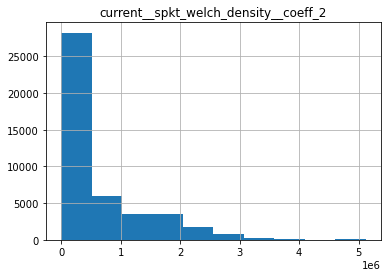

In [11]:
# plot histogram of "current__spkt_welch_density__coeff_2" column with seaborn
df.hist(column="current__spkt_welch_density__coeff_2")
plt.show()
